In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
df=pd.read_csv(r'D:\DATA SCIENCE\NLP\Project\train.csv')

In [3]:
df=df.sample(30000,random_state=4)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
198127,198127,570,140055,Where can I buy best quality customized cupcak...,"Where can I buy delicious, fresh & hand made c...",1
338078,338078,361056,465606,How can you determine the valency of hydrogen?,How is valency of phosphorus determined?,0
246894,246894,344397,360022,How can I inspire you?,How can I inspire myself?,0
79011,79011,134619,1121,What are the must places to visit in Kerala (6...,What are the best places to visit in Kerala fo...,1
150179,150179,236419,236420,How do you qualify for gastric bypass surgery?,What are the positive and negative side effect...,0


In [5]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [6]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [7]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()*100/df['is_duplicate'].count())

is_duplicate
0    18827
1    11173
Name: count, dtype: int64
is_duplicate
0    62.756667
1    37.243333
Name: count, dtype: float64


In [11]:
qid=pd.Series(df['qid1'].to_list() + df['qid2'].to_list())
print("No of Unique Question:",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("No of Question Repeated :",x.sum())

No of Unique Question: 55266
No of Question Repeated : 3462


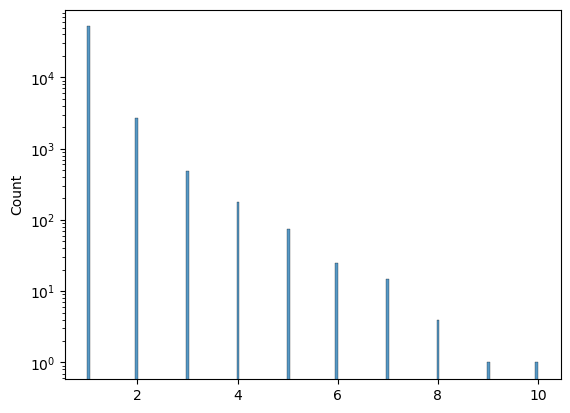

In [12]:
sns.histplot(qid.value_counts().values,bins=160)
plt.yscale('log')

In [13]:
df['q1_len']=df['question1'].str.len()
df["q2_len"]=df['question2'].str.len()
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,21,24
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,53,64
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,45,92
...,...,...,...,...,...,...,...,...
157329,157329,246039,246040,what is banking on wheels,what are the advantages and disadvantages of b...,0,25,66
187874,187874,286239,286240,do employees at diodes have a good work life b...,do employees at the gap have a good work life ...,0,103,104
6467,6467,12668,12669,what countries does the equator go through,can you go from one country to the neighbourin...,0,42,62
266471,266471,200875,383653,what is the format of vat and cst number,if my product is changing states do i have to...,0,40,93


In [14]:
df['q1_num_words']=df['question1'].apply(lambda x: len(x.split(" ")) )
df['q2_num_words']=df['question2'].apply(lambda x: len(x.split(" ")) )
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76,11,17
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39,8,6
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,21,24,5,5
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,53,64,13,12
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,45,92,8,18
...,...,...,...,...,...,...,...,...,...,...
157329,157329,246039,246040,what is banking on wheels,what are the advantages and disadvantages of b...,0,25,66,5,11
187874,187874,286239,286240,do employees at diodes have a good work life b...,do employees at the gap have a good work life ...,0,103,104,18,19
6467,6467,12668,12669,what countries does the equator go through,can you go from one country to the neighbourin...,0,42,62,7,12
266471,266471,200875,383653,what is the format of vat and cst number,if my product is changing states do i have to...,0,40,93,9,22


In [15]:
def common_words(row):
    w1=set(map(lambda x: x.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda x: x.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [16]:
df['common_words']=df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76,11,17,6
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39,8,6,3
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,21,24,5,5,4
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,53,64,13,12,8
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,45,92,8,18,3


In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
df["Total_unique_words"]=df.apply(total_words,axis=1)

In [18]:
df['word_share']=round(df['common_words']/df['Total_unique_words'],2)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,Total_unique_words,word_share
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76,11,17,6,26,0.23
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39,8,6,3,14,0.21


Maximum Words: 406
Minimum Words: 0
Average Words: 58.5322


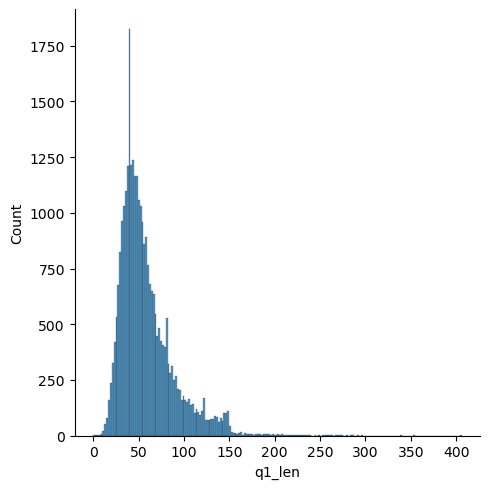

In [19]:
sns.displot(df['q1_len'])
print("Maximum Words:" ,df['q1_len'].max())
print("Minimum Words:" ,df['q1_len'].min())
print("Average Words:",df['q1_len'].mean())

Maximum Words: 739
Minimum Words: 0
Average Words: 59.167366666666666


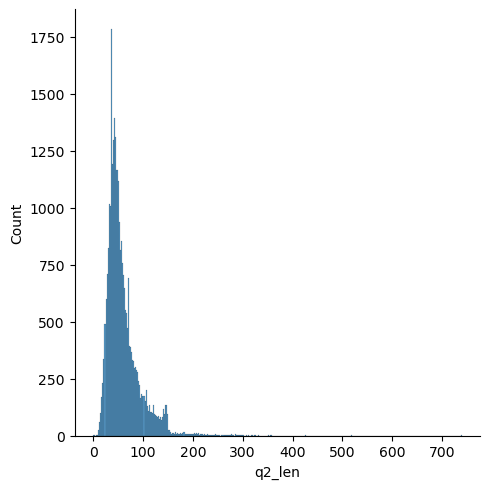

In [20]:
sns.displot(df['q2_len'])
print("Maximum Words:" ,df['q2_len'].max())
print("Minimum Words:" ,df['q2_len'].min())
print("Average Words:",df['q2_len'].mean())

In [21]:
df.drop(df[df['q1_len'] <= 8].index, inplace=True)
df.drop(df[df['q2_len'] <= 8].index, inplace=True)


In [22]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,Total_unique_words,word_share
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76,11,17,6,26,0.23
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39,8,6,3,14,0.21
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,21,24,5,5,4,10,0.40
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,53,64,13,12,8,25,0.32
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,45,92,8,18,3,25,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157329,157329,246039,246040,what is banking on wheels,what are the advantages and disadvantages of b...,0,25,66,5,11,3,16,0.19
187874,187874,286239,286240,do employees at diodes have a good work life b...,do employees at the gap have a good work life ...,0,103,104,18,19,17,37,0.46
6467,6467,12668,12669,what countries does the equator go through,can you go from one country to the neighbourin...,0,42,62,7,12,2,18,0.11
266471,266471,200875,383653,what is the format of vat and cst number,if my product is changing states do i have to...,0,40,93,9,22,4,29,0.14


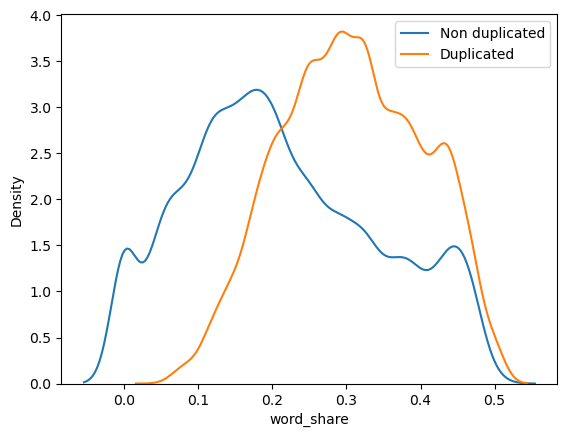

In [50]:
sns.kdeplot(df[df['is_duplicate']==0]['word_share'],label='Non duplicated')
sns.kdeplot(df[df['is_duplicate']==1]['word_share'],label='Duplicated')
plt.legend()
plt.show()

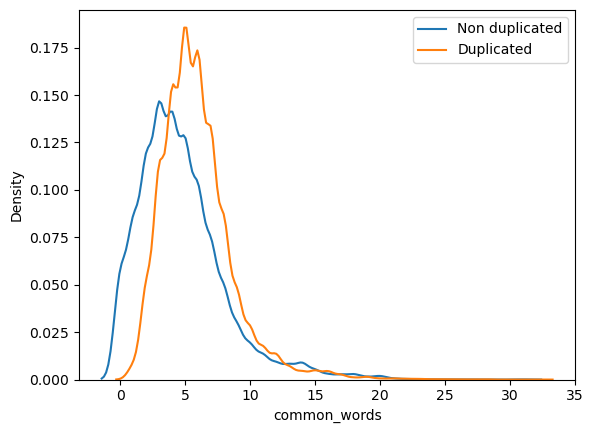

In [51]:
sns.kdeplot(df[df['is_duplicate']==0]['common_words'],label='Non duplicated')
sns.kdeplot(df[df['is_duplicate']==1]['common_words'],label='Duplicated')
plt.legend()
plt.show()

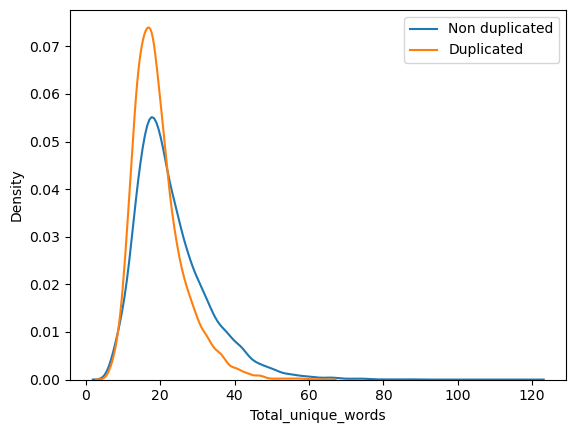

In [52]:
sns.kdeplot(df[df['is_duplicate']==0]['Total_unique_words'],label='Non duplicated')
sns.kdeplot(df[df['is_duplicate']==1]['Total_unique_words'],label='Duplicated')
plt.legend()
plt.show()

In [23]:
sf=df.copy(deep=True)

In [24]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
question=list(sf['question1']) + list(sf['question2'])
cv=CountVectorizer(max_features=3000)
q1,q2=np.vsplit(cv.fit_transform(question).toarray(),2)

In [25]:
temp1=pd.DataFrame(q1,index=sf.index)
temp2=pd.DataFrame(q2,index=sf.index)
temp=pd.concat([temp1,temp2],axis=1)

In [26]:
sf_new=pd.concat([sf,temp],axis=1)
sf_new=sf_new.drop(['question1','question2','qid1','qid2'],axis=1)

In [27]:
sf_new.drop('id',inplace=True,axis=1)

In [28]:
x=sf_new.drop('is_duplicate',axis=1).values
y=pd.DataFrame(sf_new.loc[:,'is_duplicate'])
y


,is_duplicate
198127,1
338078,0
246894,0
79011,1
150179,0
...,...
157329,0
187874,0
6467,0
266471,0


In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4443
           1       0.53      0.75      0.62      1555

    accuracy                           0.76      5998
   macro avg       0.71      0.76      0.73      5998
weighted avg       0.80      0.76      0.78      5998



In [31]:
from sklearn.linear_model import LogisticRegression
ls=LogisticRegression()
ls.fit(xtrain,ytrain)
ypred=ls.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4095
           1       0.58      0.66      0.61      1903

    accuracy                           0.74      5998
   macro avg       0.70      0.72      0.71      5998
weighted avg       0.75      0.74      0.74      5998



In [32]:
from sklearn.naive_bayes import GaussianNB
gs=GaussianNB()
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62      2424
           1       0.77      0.47      0.58      3574

    accuracy                           0.60      5998
   macro avg       0.64      0.63      0.60      5998
weighted avg       0.66      0.60      0.60      5998



In [34]:
af=df.copy(deep=True)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
qu1,qu2=np.vsplit(tfidf.fit_transform(question).toarray(),2)

In [35]:
qu1temp=pd.DataFrame(qu1,index=af.index)
qu2temp=pd.DataFrame(qu2,index=af.index)
new_af=pd.concat([qu1temp,qu2temp],axis=1)
new_af=pd.concat([af,new_af],axis=1)


In [36]:
af_new=pd.concat([new_af,temp],axis=1)
af_new=new_af.drop(['question1','question2','qid1','qid2'],axis=1)
af_new.drop(['id'],inplace=True,axis=1)

In [38]:
af_new

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,Total_unique_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
198127,1,62,76,11,17,6,26,0.23,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338078,0,45,39,8,6,3,14,0.21,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246894,0,21,24,5,5,4,10,0.40,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79011,1,53,64,13,12,8,25,0.32,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150179,0,45,92,8,18,3,25,0.12,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157329,0,25,66,5,11,3,16,0.19,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187874,0,103,104,18,19,17,37,0.46,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6467,0,42,62,7,12,2,18,0.11,0.0,0.0,...,0.0,0.0,0.186631,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266471,0,40,93,9,22,4,29,0.14,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
x=af_new.drop('is_duplicate',axis=1).values
y=pd.DataFrame(af_new.loc[:,'is_duplicate'])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4398
           1       0.54      0.73      0.62      1600

    accuracy                           0.76      5998
   macro avg       0.71      0.75      0.72      5998
weighted avg       0.79      0.76      0.77      5998



In [42]:
from sklearn.linear_model import LogisticRegression
ls=LogisticRegression()
ls.fit(xtrain,ytrain)
ypred=ls.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))


              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4292
           1       0.52      0.66      0.58      1706

    accuracy                           0.73      5998
   macro avg       0.68      0.71      0.69      5998
weighted avg       0.76      0.73      0.74      5998



In [43]:
from sklearn.naive_bayes import GaussianNB
gs=GaussianNB()
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.53      0.78      0.63      2614
           1       0.73      0.47      0.57      3384

    accuracy                           0.60      5998
   macro avg       0.63      0.62      0.60      5998
weighted avg       0.65      0.60      0.60      5998



In [66]:
from nltk.corpus import stopwords
def fetch_token_features(row):
    q1=row['question1']
    q2=row['question2']
    safe_div=0.0001
    stop_words=stopwords.words('english')
    token_features=[0.0]*8
    #convert sentence into token
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    #get non stop words
    q1_words=set([word for word in q1_tokens if word not in stop_words])
    q2_words=set([word for word in q2_tokens if word not in stop_words])
    #get stop words
    q1_stops=set([word for word in q1_tokens if word  in stop_words])
    q2_stops=set([word for word in q1_tokens if word  in stop_words])
    
    #common non stops words
    common_words_count=len(q1_words.intersection(q2_words))
    #common stop words
    common_stop_count=len(q1_stops.intersection(q2_stops))
    #common tken words
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0]=common_words_count/(min(len(q1_words),len(q2_words))+safe_div)
    token_features[1]=common_words_count/(max(len(q1_words),len(q2_words))+safe_div)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+safe_div)
    token_features[3]=common_stop_count/(min(len(q1_stops),len(q2_stops))+safe_div)                                      
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+safe_div)                                      
    token_features[5]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+safe_div)         
                                          
    #check both question last words are same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    #check both question first words are same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0]) 
    return token_features

In [67]:
token_features=df.apply(fetch_token_features,axis=1)
df["cwc_min"]=list(map(lambda x: x[0], token_features))
df["cwc_max"]=list(map(lambda x: x[1], token_features))
df["csc_min"]=list(map(lambda x: x[2], token_features))
df["csc_max"]=list(map(lambda x: x[3], token_features))
df["ctc_min"]=list(map(lambda x: x[4], token_features))
df["ctc_max"]=list(map(lambda x: x[5], token_features))
df["last_word_eq"]=list(map(lambda x: x[6], token_features))
df["first_word_eq"]=list(map(lambda x: x[7], token_features))

In [73]:
pip install distance

     -------------------------------------- 180.3/180.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16282 sha256=d80bbb52ac79b31148fda1106cc03093750ffa439cb5ec0cf83c924b308d5fec
  Stored in directory: c:\users\mayur kini\appdata\local\pip\cache\wheels\6a\41\b0\39f403bd1fb459600f3ced3f74e8e88ffd5a409584a043785a
Successfully built distance
Note: you may need to restart the kernel to use updated packages.


In [74]:
import distance

def fetch_length_features(row):
    q1=row['question1']
    q2=row['question2']
    length_features=[0.0]*3
    #convert sentence into token
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #absolute lenght feature
    length_features[0]=abs(len(q1_tokens)-len(q2_tokens))
    #avg length feature
    length_features[1]=(len(q1_tokens)+len(q2_tokens))/2
    
    #Ratio of the length of the longest substring among the two questions to the length of the smaller question
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    return length_features
    
    

In [75]:
length_features=df.apply(fetch_length_features,axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [76]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76,11,17,...,0.299997,0.999975,0.999975,0.545450,0.545450,1,1,3,12.5,0.253968
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39,8,6,...,0.333322,0.999980,0.999980,0.499992,0.499992,0,1,2,7.0,0.300000
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,21,24,5,5,...,0.999900,0.999975,0.999975,0.799984,0.799984,0,1,0,5.0,0.818182
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,53,64,13,12,...,0.428565,0.999980,0.999980,0.666661,0.666661,0,1,0,12.0,0.537037
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,45,92,8,18,...,0.333330,0.999975,0.999975,0.374995,0.374995,1,0,8,12.0,0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157329,157329,246039,246040,what is banking on wheels,what are the advantages and disadvantages of b...,0,25,66,5,11,...,0.199996,0.999967,0.999967,0.599988,0.599988,0,1,6,8.0,0.384615
187874,187874,286239,286240,do employees at diodes have a good work life b...,do employees at the gap have a good work life ...,0,103,104,18,19,...,0.899991,0.999986,0.999986,0.941171,0.941171,1,1,1,17.5,0.778846
6467,6467,12668,12669,what countries does the equator go through,can you go from one country to the neighbourin...,0,42,62,7,12,...,0.199996,0.999975,0.999975,0.285710,0.285710,0,0,5,9.5,0.162791
266471,266471,200875,383653,what is the format of vat and cst number,if my product is changing states do i have to...,0,40,93,9,22,...,0.333328,0.999980,0.999980,0.444440,0.444440,0,0,11,14.5,0.146341


In [78]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [79]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


In [81]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

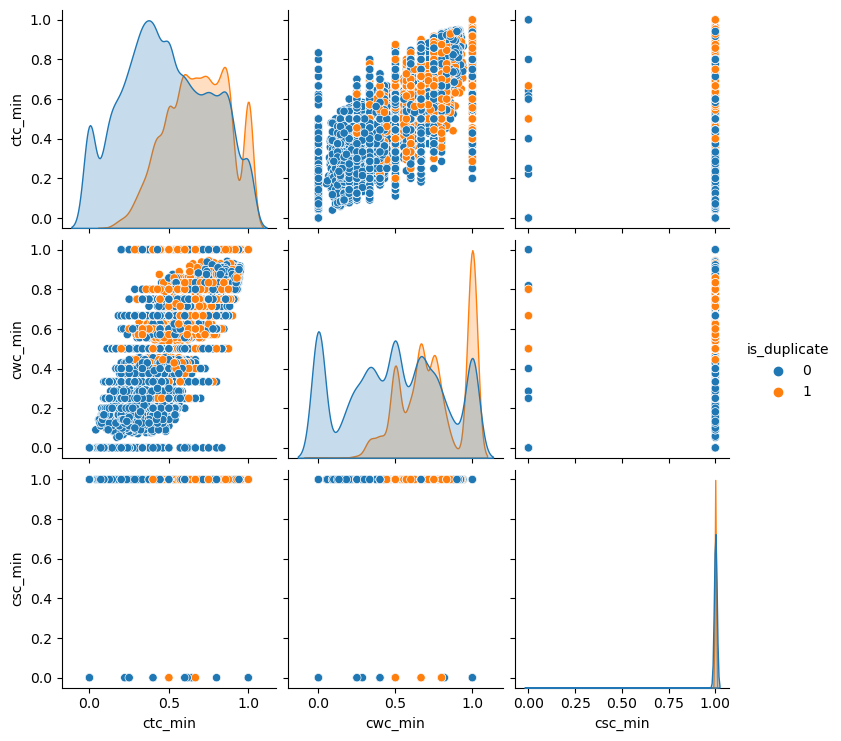

In [84]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

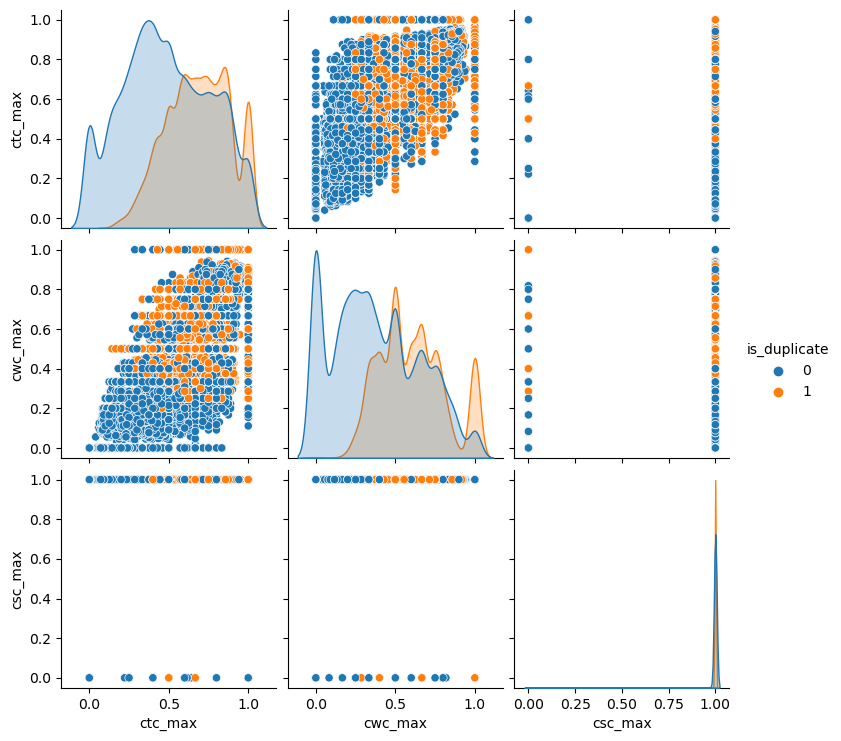

In [86]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


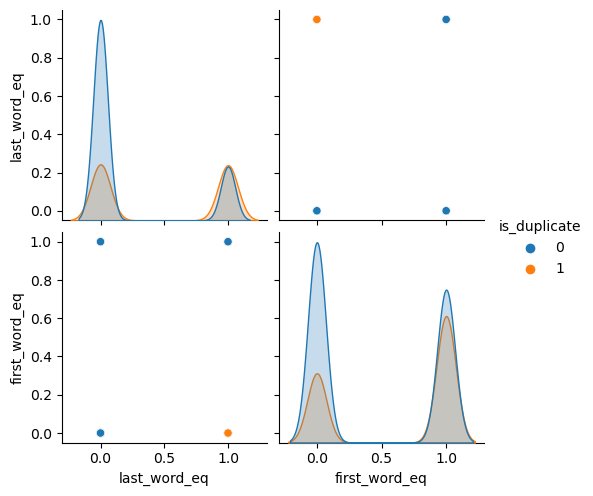

In [87]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


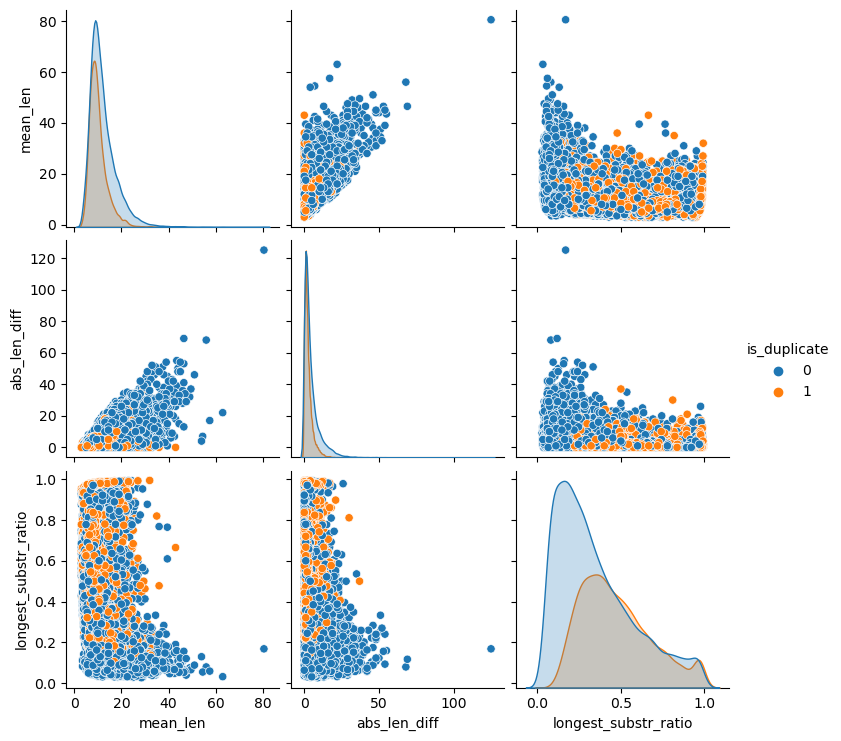

In [88]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


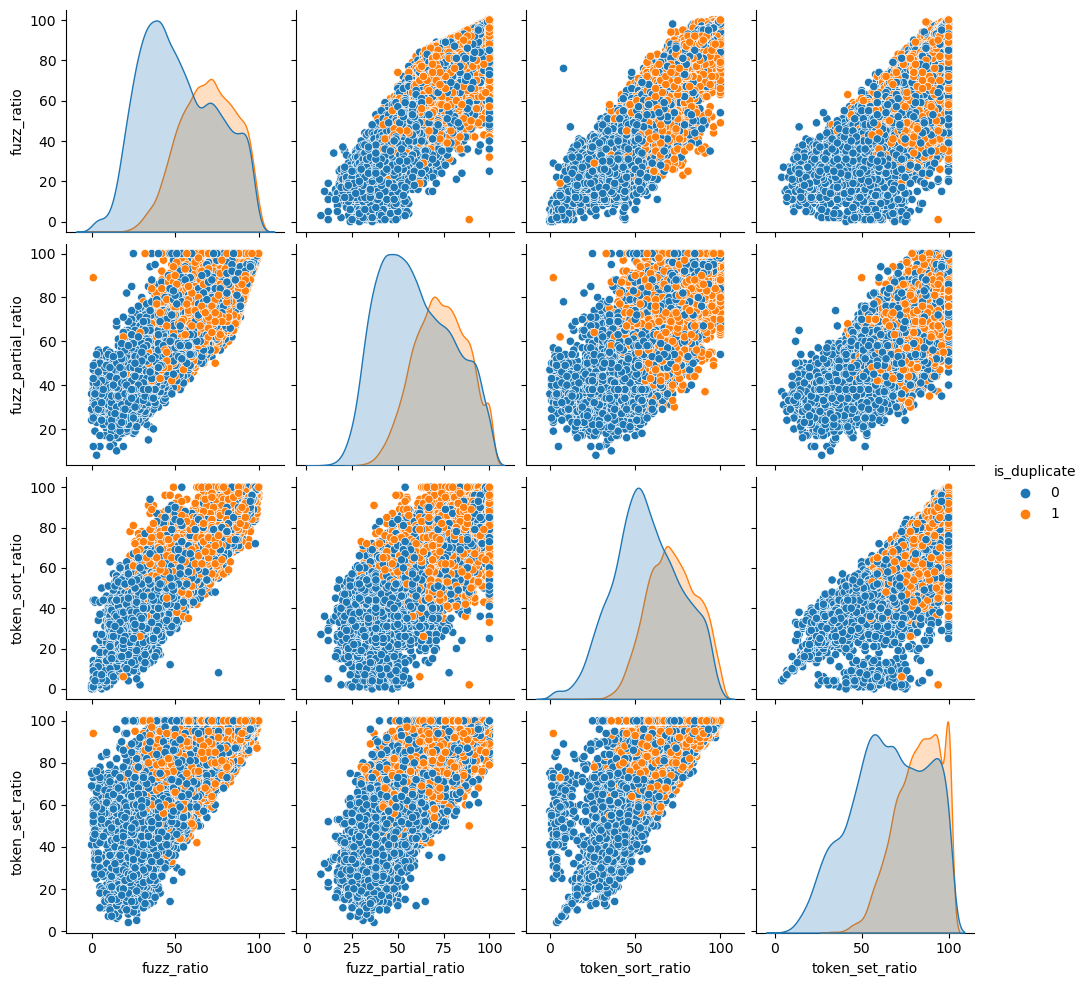

In [89]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,62,76,11,17,...,0.545450,1,1,3,12.5,0.253968,64,55,56,64
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,45,39,8,6,...,0.499992,0,1,2,7.0,0.300000,50,54,64,67
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,21,24,5,5,...,0.799984,0,1,0,5.0,0.818182,84,90,84,89
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,53,64,13,12,...,0.666661,0,1,0,12.0,0.537037,79,81,69,84
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,45,92,8,18,...,0.374995,1,0,8,12.0,0.347826,45,58,47,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157329,157329,246039,246040,what is banking on wheels,what are the advantages and disadvantages of b...,0,25,66,5,11,...,0.599988,0,1,6,8.0,0.384615,48,72,51,72
187874,187874,286239,286240,do employees at diodes have a good work life b...,do employees at the gap have a good work life ...,0,103,104,18,19,...,0.941171,1,1,1,17.5,0.778846,95,94,93,96
6467,6467,12668,12669,what countries does the equator go through,can you go from one country to the neighbourin...,0,42,62,7,12,...,0.285710,0,0,5,9.5,0.162791,40,48,40,44
266471,266471,200875,383653,what is the format of vat and cst number,if my product is changing states do i have to...,0,40,93,9,22,...,0.444440,0,0,11,14.5,0.146341,36,52,46,52


In [91]:
af=df.copy(deep=True)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
qu1,qu2=np.vsplit(tfidf.fit_transform(question).toarray(),2)

In [92]:
qu1temp=pd.DataFrame(qu1,index=af.index)
qu2temp=pd.DataFrame(qu2,index=af.index)
new_af=pd.concat([qu1temp,qu2temp],axis=1)
new_af=pd.concat([af,new_af],axis=1)


In [93]:
af_new=pd.concat([new_af,temp],axis=1)
af_new=new_af.drop(['question1','question2','qid1','qid2'],axis=1)
af_new.drop(['id'],inplace=True,axis=1)

In [94]:
x=af_new.drop('is_duplicate',axis=1).values
y=pd.DataFrame(af_new.loc[:,'is_duplicate'])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      3964
           1       0.67      0.72      0.69      2034

    accuracy                           0.78      5998
   macro avg       0.76      0.77      0.76      5998
weighted avg       0.79      0.78      0.79      5998



In [98]:
sf=df.copy(deep=True)
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
question=list(sf['question1']) + list(sf['question2'])
cv=CountVectorizer(max_features=3000)
q1,q2=np.vsplit(cv.fit_transform(question).toarray(),2)

In [99]:
temp1=pd.DataFrame(q1,index=sf.index)
temp2=pd.DataFrame(q2,index=sf.index)
temp=pd.concat([temp1,temp2],axis=1)
sf_new=pd.concat([sf,temp],axis=1)
sf_new=sf_new.drop(['question1','question2','qid1','qid2'],axis=1)
sf_new.drop('id',inplace=True,axis=1)

In [100]:
x=sf_new.drop('is_duplicate',axis=1).values
y=pd.DataFrame(sf_new.loc[:,'is_duplicate'])


In [101]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4026
           1       0.66      0.73      0.70      1972

    accuracy                           0.79      5998
   macro avg       0.76      0.77      0.77      5998
weighted avg       0.80      0.79      0.79      5998

